In [620]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import sqrt
import random
from statistics import mean

%matplotlib inline
from sklearn import datasets, metrics, neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [621]:
salary = pd.read_csv ('/Users/allanwaweru/Downloads/csci3360 finalproject/2017salary.csv',index_col=0)

stats = pd.read_csv ('/Users/allanwaweru/Downloads/csci3360 finalproject/2017seasonstats.csv',index_col=0)



/Users/allanwaweru/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/allanwaweru/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [622]:


salary.head()



,Player,Tm,season17_18
1,Stephen Curry,GSW,34682550.0
2,LeBron James,CLE,33285709.0
3,Paul Millsap,DEN,31269231.0
4,Gordon Hayward,BOS,29727900.0
5,Blake Griffin,DET,29512900.0


In [623]:

stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1.0,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.0,1.0,...,1.0,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
2.0,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,12.0,1.0,...,1.0,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
3.0,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,17.0,1.0,...,1.0,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
4.0,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,1.0,...,1.0,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
5.0,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,13.0,1.0,...,1.0,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0


In [624]:
gk = salary.groupby('Tm')
gk.first()

,Player,season17_18
Tm,,
ATL,Kent Bazemore,16910113.0
BOS,Gordon Hayward,29727900.0
BRK,Allen Crabbe,19332500.0
CHI,Dwyane Wade,15550000.0
CHO,Dwight Howard,23500000.0
CLE,LeBron James,33285709.0
DAL,Harrison Barnes,23112004.0
DEN,Paul Millsap,31269231.0
DET,Blake Griffin,29512900.0


In [625]:
salary = salary[['Player', 'season17_18']]
salary.rename(columns={'season17_18':'salary17_18'},inplace = True)
salary['salary17_18'] = salary['salary17_18'].astype(int)
#salary['salary17_18'] = salary['salary17_18']/1000000




/Users/allanwaweru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/lx/7p5514dn4m551pm675rgp4_m0000gn/T/ipykernel_9460/4167398636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['salary17_18'] = salary['salary17_18'].astype(int)


In [626]:
stats_salary.drop_duplicates(subset=['Player'], keep='first',inplace=True)
stats_salary.head(10)


,Year,Player,Pos,Age,G,PER,MPG,APG,RPG,TOPG,BPG,SPG,PPG,salary17_18
209,2017.0,LeBron James,SF,32.0,74.0,27.0,37.756757,8.729730,8.648649,4.094595,0.594595,1.243243,26.405405,33.285709
259,2017.0,Kyle Lowry,PG,30.0,60.0,23.0,37.400000,6.950000,4.800000,2.883333,0.316667,1.466667,22.400000,28.703704
241,2017.0,Zach LaVine,SG,21.0,47.0,15.0,37.212766,2.957447,3.382979,1.808511,0.212766,0.872340,18.914894,3.202217
430,2017.0,Andrew Wiggins,SF,21.0,82.0,17.0,37.170732,2.304878,4.012195,2.280488,0.365854,1.000000,23.573171,7.574322
63,2017.0,Jimmy Butler,SF,27.0,76.0,25.0,36.960526,5.486842,6.184211,2.092105,0.421053,1.881579,23.894737,19.301070
400,2017.0,Karl-Anthony Towns,C,21.0,82.0,26.0,36.951220,2.682927,12.280488,2.585366,1.256098,0.695122,25.134146,6.216840
169,2017.0,James Harden,PG,27.0,81.0,27.0,36.382716,11.185185,8.135802,5.728395,0.456790,1.481481,29.086420,28.299399
418,2017.0,John Wall,PG,26.0,78.0,23.0,36.358974,10.653846,4.179487,4.141026,0.628205,2.012821,23.141026,18.063850
102,2017.0,Anthony Davis,C,23.0,75.0,28.0,36.106667,2.093333,11.813333,2.413333,2.226667,1.253333,27.986667,23.775506
252,2017.0,Damian Lillard,PG,26.0,75.0,24.0,35.920000,5.853333,4.906667,2.626667,0.266667,0.906667,26.986667,26.153057


In [627]:
stats = stats[['Year','Player','Pos','Age','G','PER', 'MP','PTS','AST','TRB','TOV','BLK','STL']]

In [628]:
c = ['MPG', 'APG','RPG','TOPG','BPG','SPG','PPG']
w = ['MP','AST','TRB','TOV','BLK','STL', 'PTS'] 


for i,s in zip(c,w):
    stats[i] = stats[s] / stats['G']

stats.drop(w,axis=1,inplace=True)
stats_salary = pd.merge(stats, salary) 

In [629]:
stats_salary.count()

Year           450
Player         450
Pos            450
Age            450
G              450
PER            450
MPG            450
APG            450
RPG            450
TOPG           450
BPG            450
SPG            450
PPG            450
salary17_18    450
dtype: int64

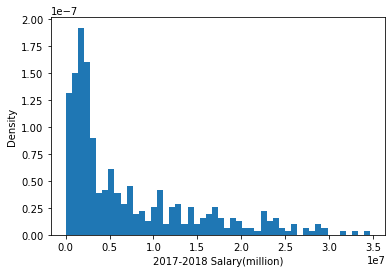

In [630]:
plt.hist(stats_salary['salary17_18'],density=True,bins=50)
plt.xlabel('2017-2018 Salary(million)')
plt.ylabel('Density')

plt.show()

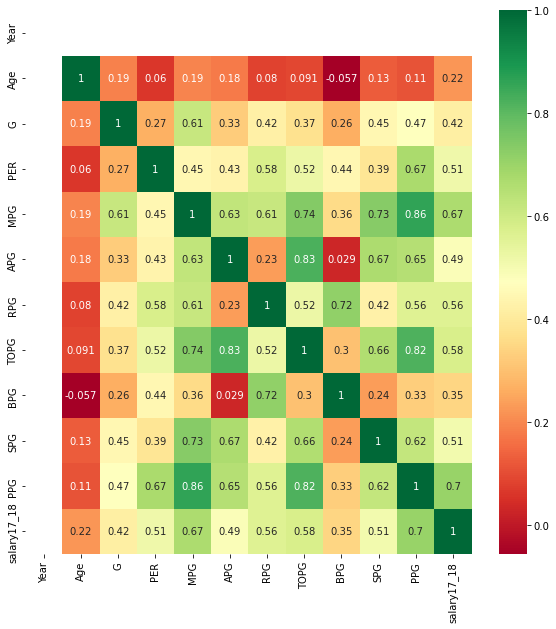

In [631]:
corrmat = stats_salary.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(stats_salary[top_corr_features].corr(),annot=True,cmap="RdYlGn")

/var/folders/lx/7p5514dn4m551pm675rgp4_m0000gn/T/ipykernel_9460/240394398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['salary17_18'] = salary['salary17_18'].astype(int)


[0.11147646 0.09640414 0.09089391 0.10634536 0.0962137  0.10056912
 0.10044593 0.09674549 0.09775124 0.10315466]


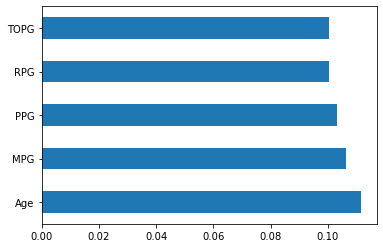

In [632]:
salary['salary17_18'] = salary['salary17_18'].astype(int)
X = stats_salary.iloc[:,3:13]  #independent columns
y = stats_salary.iloc[:,-1]    #target column i.e salary

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

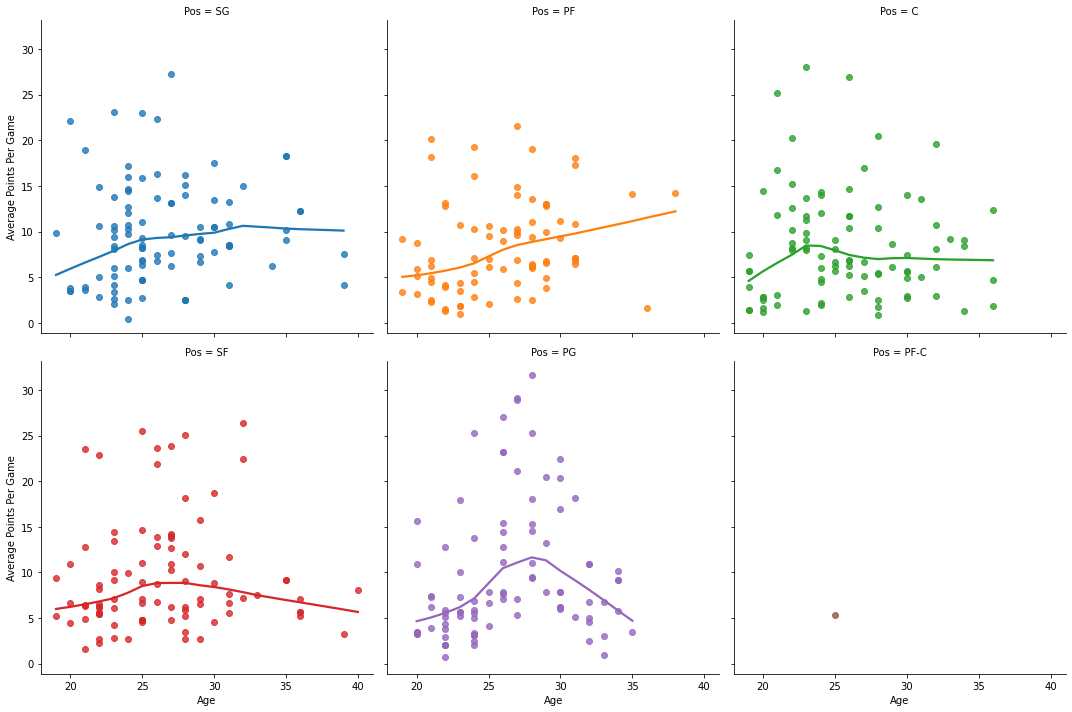

In [602]:
sns.lmplot(x="Age", y="PPG",hue="Pos",col="Pos",col_wrap=3, 
           data=stats_salary,lowess=True).set(
    xlabel='Age', 
    ylabel='Average Points Per Game')

In [603]:
stats_salary.sort_values(by='PPG',ascending=False,inplace = True)
stats_salary[['Player','PPG']].head(10)

,Player,PPG
426,Russell Westbrook,31.580247
169,James Harden,29.086420
392,Isaiah Thomas,28.934211
102,Anthony Davis,27.986667
110,DeMar DeRozan,27.297297
252,Damian Lillard,26.986667
91,DeMarcus Cousins,26.972222
209,LeBron James,26.405405
245,Kawhi Leonard,25.513514
100,Stephen Curry,25.303797


[Text(0.5, 0, 'Position'), Text(0, 0.5, 'Average Points Per Game')]

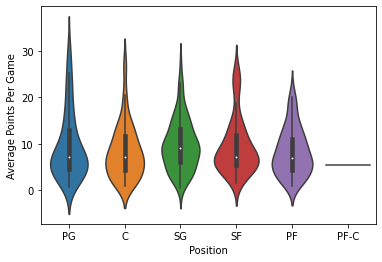

In [604]:
sns.violinplot(x="Pos", y="PPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Points Per Game')

In [605]:
stats_salary.sort_values(by='MPG',ascending=False,inplace = True)
stats_salary[['Player','MPG']].head(10)

,Player,MPG
209,LeBron James,37.756757
259,Kyle Lowry,37.400000
241,Zach LaVine,37.212766
430,Andrew Wiggins,37.170732
63,Jimmy Butler,36.960526
400,Karl-Anthony Towns,36.951220
169,James Harden,36.382716
418,John Wall,36.358974
102,Anthony Davis,36.106667
252,Damian Lillard,35.920000


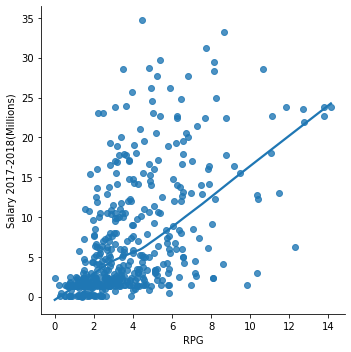

In [606]:
sns.lmplot(x="RPG", y="salary17_18", data=stats_salary,lowess=True).set(xlabel='RPG', ylabel='Salary 2017-2018(Millions)')

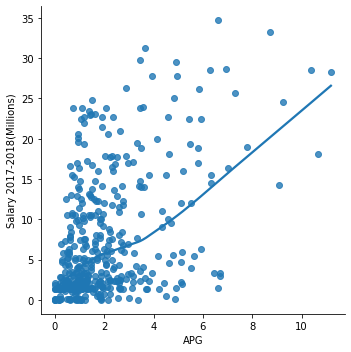

In [607]:
sns.lmplot(x="APG", y="salary17_18", data=stats_salary,lowess=True).set(xlabel='APG', ylabel='Salary 2017-2018(Millions)')


[Text(0.5, 0, 'Position'), Text(0, 0.5, 'Average Assists Per Game')]

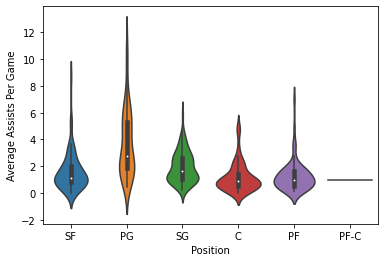

In [608]:
sns.violinplot(x="Pos", y="APG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Assists Per Game')

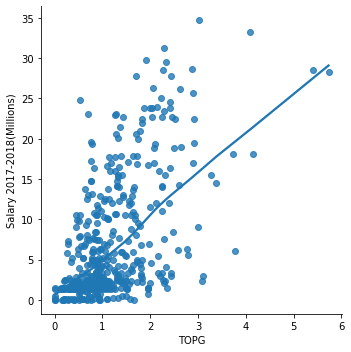

In [609]:
sns.lmplot(x="TOPG", y="salary17_18", data=stats_salary,lowess=True).set(xlabel='TOPG', ylabel='Salary 2017-2018(Millions)')

[Text(0.5, 0, 'Position'), Text(0, 0.5, 'Average Turnovers Per Game')]

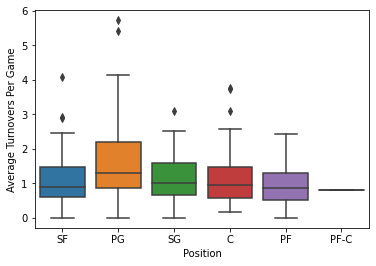

In [610]:
sns.boxplot(x="Pos", y="TOPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Turnovers Per Game')

In [611]:
X = stats_salary.iloc[:,3:13]  #independent columns
y = stats_salary.iloc[:,-1] 
# Splitting data into train and test


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)



In [612]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)
print(f"Original KNN Testing score: {knn.score(X_test, y_test)}")

Original KNN Testing score: 0.36811901324761964


In [613]:
# Finding optimal number of k-neighbors for maximum accuracy
params = {'n_neighbors':list(range(1,50))}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,y_train)
model.best_params_
#print(f"Optimal n-neigbors for highest model accuracy: {model.best_params_}")

{'n_neighbors': 26}

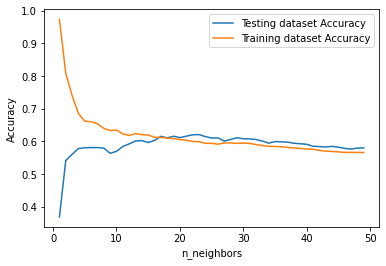

In [614]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [615]:
# use the best hyperparameters
knn = KNeighborsRegressor(n_neighbors = 22)
knn.fit(X_train, y_train)

print(f"KNN Model")

print(f"Training score after hyperparameter tuning: {knn.score(X_train, y_train)}")

# use the best hyperparameters
knn2 = KNeighborsRegressor(n_neighbors = 22)
knn2.fit(X_test, y_test)
print(f"Testing score after hyperparameter tuning: {knn.score(X_test, y_test)}")

KNN Model
Training score after hyperparameter tuning: 0.599433687120313
Testing score after hyperparameter tuning: 0.6198703285278253


In [616]:
clf = RandomForestRegressor(random_state=0)
dtree = clf.fit(X_train, y_train)

yp = clf.predict(X_test)

print(f"Random Forest Regressor Model")
print(f"Training score: {clf.score(X_train, y_train)}")
print(f"Testing score: {clf.score(X_test, y_test)}")

 

Random Forest Regressor Model
Training score: 0.9356441961241224
Testing score: 0.7370075627526966


In [617]:
reg = LinearRegression().fit(X_train, y_train)
print(f"Linear Regression Model")
print(f"Training score: {reg.score(X_train, y_train)}")

print(f"Testing score: {reg.score(X_test, y_test)}")


Linear Regression Model
Training score: 0.5542881785218494
Testing score: 0.6262110766500655


In [618]:
def RegEvaluation(model, y_test, X_test, nameindex, yname,totaldt, predict=True):
    ypred = model.predict(X_test)
    X_test['Pred_Y'] = model.predict(X_test)
    dt = pd.merge(totaldt,X_test,how = 'right')
    X_test.drop(['Pred_Y'],axis=1,inplace=True)
    dt = dt[[nameindex, yname,'Pred_Y']]
    dt.sort_values(by = yname, ascending = False,inplace=True)
   
    if predict:
        return dt.head(50)


In [619]:
# Random Forest Model proves to have highest accuracy on the testing dataset
print(f"Comparison of real and predicted values (Test data)")
clf = tree.DecisionTreeRegressor(max_depth=4, criterion="mse") 
dtree = clf.fit(X_train, y_train)

RegEvaluation(dtree, y_test, X_test, 'Player', 'salary17_18',stats_salary)

Comparison of real and predicted values (Test data)


/var/folders/lx/7p5514dn4m551pm675rgp4_m0000gn/T/ipykernel_9460/1872358806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Pred_Y'] = model.predict(X_test)
/Users/allanwaweru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,salary17_18,Pred_Y
17,Kyle Lowry,28.703704,23.433039
15,Russell Westbrook,28.530608,23.433039
57,James Harden,28.299399,23.433039
74,Dwight Howard,23.500000,23.433039
6,Harrison Barnes,23.112004,16.055497
62,DeAndre Jordan,22.642350,23.433039
82,Kevin Love,22.642350,23.433039
18,Paul George,19.508958,23.433039
67,Jeff Teague,19.000000,16.055497
34,Kawhi Leonard,18.868625,23.433039
